<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v2_findbestLR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models

# 4-layers Convnet & 2-layers Fully connected Dense with MaxPooling no regulerzation and dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from keras import optimizers
import tensorflow as tf

# try to find the best learning rate by using LearningRateSchduler
# from 1e-7 to 1e-2
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7 * 10**(epoch / 10))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-8),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 20
epoch_lenth = 50
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

# no data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs,
    callbacks=[lr_schedule]
)

Epoch 1/50
100/100 [==============================] - 1260s 13s/step - loss: 0.6931 - acc: 0.5210 - val_loss: 0.6969 - val_acc: 0.5110
Epoch 2/50
100/100 [==============================] - 95s 951ms/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6957 - val_acc: 0.5240
Epoch 3/50
100/100 [==============================] - 95s 949ms/step - loss: 0.6928 - acc: 0.5190 - val_loss: 0.6930 - val_acc: 0.5340
Epoch 4/50
100/100 [==============================] - 95s 950ms/step - loss: 0.6926 - acc: 0.5255 - val_loss: 0.6931 - val_acc: 0.5400
Epoch 5/50
100/100 [==============================] - 95s 953ms/step - loss: 0.6925 - acc: 0.5220 - val_loss: 0.6917 - val_acc: 0.5400
Epoch 6/50
100/100 [==============================] - 95s 950ms/step - loss: 0.6922 - acc: 0.5170 - val_loss: 0.6900 - val_acc: 0.5310
Epoch 7/50
100/100 [==============================] - 95s 951ms/step - loss: 0.6920 - acc: 0.5245 - val_loss: 0.6909 - val_acc: 0.5360
Epoch 8/50
100/100 [==============================] - 9

(1e-07, 0.01, 0.4, 1.0)

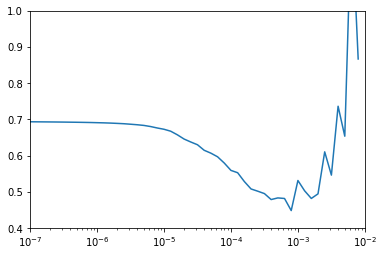

In [ ]:
import matplotlib.pyplot as plt

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-2, 0.4, 1])

Information from this chart:
1. In the beginning of training, 1e-7 to 1e-5 is too slow, since the slope is small (loss object didn't decrease a lot.
2. for 1e-5 to 5e-3, the loss object decrease in a proper speed after each epochs.
3. from 1e-3 to larger learning rate, the loss object didn't always get smaller after each epochs.

In summary, for this project, set learning rate to be 5e-3 might be a good start. 